# Determinación Experimental del Coeficiente de Expansión Térmica

## Introducción

El propósito de este proyecto es determinar experimentalmente el coeficiente de expansión térmica (α) de diferentes materiales (Aluminio, Cobre y Hierro) utilizando mediciones de cambio en la longitud ($ \Delta L $) y la variación de temperatura ($ \Delta T $). Se emplearon dos termocuplas para medir las temperaturas en ambos extremos de la varilla, de modo que se pueda obtener un valor promedio de la temperatura inicial y final. Además, se estima la incertidumbre en $ \alpha $ mediante la propagación de errores, lo que permite cuantificar la precisión del experimento.

## Desarrollo Teórico

La dilatación térmica lineal de un sólido se describe con la siguiente relación:

$$
\alpha = \frac{\Delta L}{L_0 \Delta T}
$$

donde:
- $ \Delta L $ es el cambio en la longitud,
- $ L_0 $ es la longitud inicial,
- $ \Delta T = T_{\text{final}} - T_{\text{inicial}} $ es el cambio de temperatura.

Para estimar la incertidumbre en $ \alpha $, se utiliza la regla de propagación de errores. Si se consideran dos fuentes de error, en $ \Delta L $ y en $ \Delta T $, la incertidumbre $ \sigma_\alpha $ se calcula como:

$$
\sigma_\alpha = \alpha \left( \frac{\sigma \Delta L}{\Delta L} + \frac{\sigma \Delta T}{\Delta T} \right)
$$

Este enfoque permite conocer cómo las incertidumbres en las mediciones se propagan al valor final de $ \alpha $.


Material: Aluminio
  Promedio:
    ΔT (promedio):  48 °C ± 0.071 °C
    α (promedio):   3.3e-05 1/°C ± 4.1e-07 1/°C
  Extremos:
    ΔT (extremos):  49 °C ± 0.2 °C
    α (máximo):     3.3e-05 1/°C ± 4.1e-07 1/°C
------------------------------------------------------

Material: Cobre
  Promedio:
    ΔT (promedio):  49 °C ± 0.071 °C
    α (promedio):   2.9e-05 1/°C ± 3.9e-07 1/°C
  Extremos:
    ΔT (extremos):  49 °C ± 0.2 °C
    α (máximo):     2.9e-05 1/°C ± 3.9e-07 1/°C
------------------------------------------------------

Material: Hierro
  Promedio:
    ΔT (promedio):  50 °C ± 0.071 °C
    α (promedio):   2.5e-05 1/°C ± 3.7e-07 1/°C
  Extremos:
    ΔT (extremos):  50 °C ± 0.2 °C
    α (máximo):     2.5e-05 1/°C ± 3.7e-07 1/°C
------------------------------------------------------



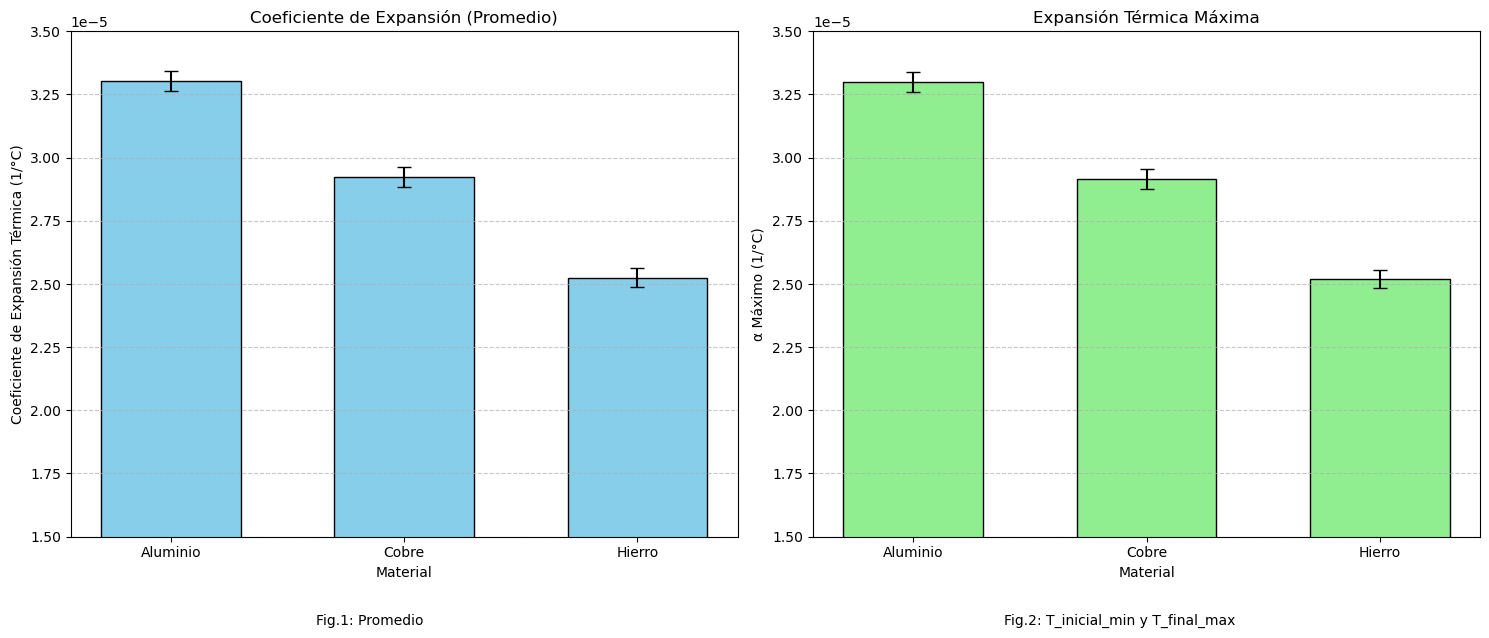

In [25]:
# Importamos las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular el coeficiente de expansión térmica
def calcular_alpha(delta_L, L0, T_inicial, T_final):
    """
    Calcula el coeficiente de expansión térmica (α) utilizando la fórmula:
        α = ΔL / (L0 · ΔT)
    donde ΔT = T_final - T_inicial.
    """
    delta_T = T_final - T_inicial
    alpha = delta_L / (L0 * delta_T)
    return alpha

# Nueva función para calcular la incertidumbre en α usando errores relativos
def error_alpha(alpha, delta_L, T_inicial, T_final, error_delta_L=0.000001, error_delta_T=0.2, L0 = 0.7, error_L0 = 0.001):
    """
    Estima la incertidumbre en el coeficiente de expansión térmica (α) aplicando
    la regla de propagación de errores en forma de sumatoria de términos relativos:

        σ_α = α * ((error_L0 / L0) + (error_delta_L / delta_L) + (error_delta_T / ΔT))

    donde ΔT = T_final - T_inicial.
    """
    delta_T = T_final - T_inicial
    return alpha * ((error_L0 / L0) + (error_delta_L / delta_L) + (error_delta_T / delta_T))

# Datos para cada material
materiales = {
    'Aluminio': {
        'L0': 0.7,              # m
        'error_L0': 0.001,      # m
        'delta_L': 0.00112,     # m
        'error_delta_L': 0.00001,  # m
        'T_inicial_izq': 25.5,   # °C
        'T_inicial_der': 25.4,
        'T_final_izq': 73.9,
        'T_final_der': 73.9,
        'error_T': 0.1          # °C
    },
    'Cobre': {
        'L0': 0.7,
        'error_L0': 0.001,
        'delta_L': 0.001,
        'error_delta_L': 0.00001,
        'T_inicial_izq': 25.3,
        'T_inicial_der': 25.2,
        'T_final_izq': 74.2,
        'T_final_der': 74.1,
        'error_T': 0.1
    },
    'Hierro': {
        'L0': 0.7,
        'error_L0': 0.001,
        'delta_L': 0.00088,
        'error_delta_L': 0.00001,
        'T_inicial_izq': 25.2,
        'T_inicial_der': 25.1,
        'T_final_izq': 75.0,
        'T_final_der': 74.9,
        'error_T': 0.1
    }
}

# Listas para almacenar resultados de la media
nombres_materiales = []
alpha_promedio = []
sigma_alpha_list = []

# Listas para almacenar resultados del valor máximo de α calculado con temperaturas extremas
alpha_max_por_material = []
sigma_alpha_max_por_material = []

# Realizamos el cálculo y el análisis estadístico para cada material
for material, datos in materiales.items():
    L0 = datos['L0']
    delta_L = datos['delta_L']

    # Obtenemos las temperaturas medidas (izquierda y derecha)
    T_iniciales = np.array([datos['T_inicial_izq'], datos['T_inicial_der']])
    T_finales   = np.array([datos['T_final_izq'], datos['T_final_der']])

    # Calculamos las temperaturas promedio
    T_inicial_prom = np.mean(T_iniciales)
    T_final_prom   = np.mean(T_finales)
    delta_T_prom = T_final_prom - T_inicial_prom
    erro_delta_T_prom = np.sqrt(2*datos['error_T']**2) / 2

    # Calculamos el coeficiente de expansión térmica usando los promedios
    alpha_avg = calcular_alpha(delta_L, L0, T_inicial_prom, T_final_prom)

    # Calculamos el error en el coeficiente usando la función de propagación de errores
    sigma_alpha_calculado = error_alpha(alpha_avg, delta_L, T_inicial_prom, T_final_prom,
                                        error_delta_L=datos['error_delta_L'], error_delta_T=datos['error_T'],
                                        L0=L0, error_L0=datos['error_L0'])

    # Calculamos el máximo α usando la mínima temperatura inicial y la máxima temperatura final
    T_inicial_min = np.min(T_iniciales)
    T_final_max   = np.max(T_finales)
    alpha_max_individual = calcular_alpha(delta_L, L0, T_inicial_min, T_final_max)
    sigma_alpha_max_individual = error_alpha(alpha_max_individual, delta_L, T_inicial_min, T_final_max,
                                             error_delta_L=datos['error_delta_L'], error_delta_T=datos['error_T'],
                                             L0=L0, error_L0=datos['error_L0'])

    # Guardamos los resultados promedio para este material
    nombres_materiales.append(material)
    alpha_promedio.append(alpha_avg)
    sigma_alpha_list.append(sigma_alpha_calculado)

    # Guardamos los resultados máximos para este material
    alpha_max_por_material.append(alpha_max_individual)
    sigma_alpha_max_por_material.append(sigma_alpha_max_individual)

    # Imprimimos un resumen del análisis para cada material
    print(f"Material: {material}")
    print(f"  Promedio:")
    print(f"    ΔT (promedio):  {delta_T_prom:.2g} °C ± {erro_delta_T_prom:.2g} °C")
    print(f"    α (promedio):   {alpha_avg:.2g} 1/°C ± {sigma_alpha_calculado:.2g} 1/°C")
    print(f"  Extremos:")
    print(f"    ΔT (extremos):  {(T_final_max - T_inicial_min):.2g} °C ± {0.2:.2g} °C")
    print(f"    α (máximo):     {alpha_max_individual:.2g} 1/°C ± {sigma_alpha_max_individual:.2g} 1/°C")
    print("------------------------------------------------------\n")


# Graficamos los coeficientes de expansión promedio con sus correspondientes error bars
x = np.arange(len(nombres_materiales))
ancho_barra = 0.6



plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.bar(x, alpha_promedio, yerr=sigma_alpha_list, capsize=5, width=ancho_barra,
    color='skyblue', edgecolor='k')
plt.xticks(x, nombres_materiales)
plt.xlabel('Material')
plt.ylabel('Coeficiente de Expansión Térmica (1/°C)')
plt.title('Coeficiente de Expansión (Promedio)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.figtext(0.25, -0.05, "Fig.1: Promedio", ha="center", fontsize=10)
plt.ylim(1.5e-5, 3.5e-5)

plt.subplot(1, 2, 2)
plt.bar(x, alpha_max_por_material, yerr=sigma_alpha_max_por_material, capsize=5, width=ancho_barra,
    color='lightgreen', edgecolor='k')
plt.xticks(x, nombres_materiales)
plt.xlabel('Material')
plt.ylabel('α Máximo (1/°C)')
plt.title('Expansión Térmica Máxima')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.figtext(0.75, -0.05, "Fig.2: T_inicial_min y T_final_max", ha="center", fontsize=10)
plt.ylim(1.5e-5, 3.5e-5)

plt.tight_layout()
plt.show()


## Análisis de Resultados

Se utilizaron los siguientes datos simulados (o experimentales) para cada material:

- **Aluminio:**
  - $ L_0 = 0.7 \, \text{m} $
  - $ \Delta L = 0.00112 \, \text{m} $
  - Temperaturas iniciales: $25.5^\circ \text{C}$ y $25.4^\circ \text{C}$ → Promedio: $25.45^\circ \text{C}$
  - Temperaturas finales: $73.9^\circ \text{C}$ (en ambos extremos) → Promedio: $73.90^\circ \text{C}$
  - $ \Delta T = 48.45^\circ \text{C} $
  - $ \alpha \approx 3.30 \times 10^{-5} \, \text{1/°C} $
  - Incerteza estimada: $1.39 \times 10^{-7} \, \text{1/°C}$

- **Cobre:**
  - $ L_0 = 0.7 \, \text{m} $
  - $ \Delta L = 0.001 \, \text{m} $
  - Temperaturas iniciales: $25.3^\circ \text{C}$ y $25.2^\circ \text{C}$ → Promedio: $25.25^\circ \text{C}$
  - Temperaturas finales: $74.2^\circ \text{C}$ y $74.1^\circ \text{C}$ → Promedio: $74.15^\circ \text{C}$
  - $ \Delta T = 48.90^\circ \text{C} $
  - $ \alpha \approx 2.92 \times 10^{-5} \, \text{1/°C} $
  - Incerteza estimada: $1.23 \times 10^{-7} \, \text{1/°C}$

- **Hierro:**
  - $ L_0 = 0.7 \, \text{m} $
  - $ \Delta L = 0.00088 \, \text{m} $
  - Temperaturas iniciales: $25.2^\circ \text{C}$ y $25.1^\circ \text{C}$ → Promedio: $25.15^\circ \text{C}$
  - Temperaturas finales: $75.0^\circ \text{C}$ y $74.9^\circ \text{C}$ → Promedio: $74.95^\circ \text{C}$
  - $ \Delta T = 49.80^\circ \text{C} $
  - $ \alpha \approx 2.52 \times 10^{-5} \, \text{1/°C} $
  - Incerteza estimada: $1.05 \times 10^{-7} \, \text{1/°C}$

**Observaciones:**

- Los valores de $ \alpha $ calculados son ligeramente superiores a los típicamente reportados en la literatura para estos materiales (por ejemplo, se espera $ \alpha \approx 2.3 \times 10^{-5} \, \text{1/°C} $ para el aluminio, $ 1.7 \times 10^{-5} \, \text{1/°C} $ para el cobre y alrededor de $ 1.2 \times 10^{-5} \, \text{1/°C} $ para el hierro).  
- Estas diferencias pueden deberse a errores sistemáticos en la medición de $ \Delta L $ o a condiciones experimentales que no replican completamente las condiciones ideales.
- La propagación de errores sugiere que la incertidumbre en $ \alpha $ es relativamente pequeña en comparación con el valor calculado, lo que indica que, asumiendo los errores de medición ingresados, la precisión es alta. Sin embargo, es importante revisar si los errores asignados son representativos de la realidad experimental.



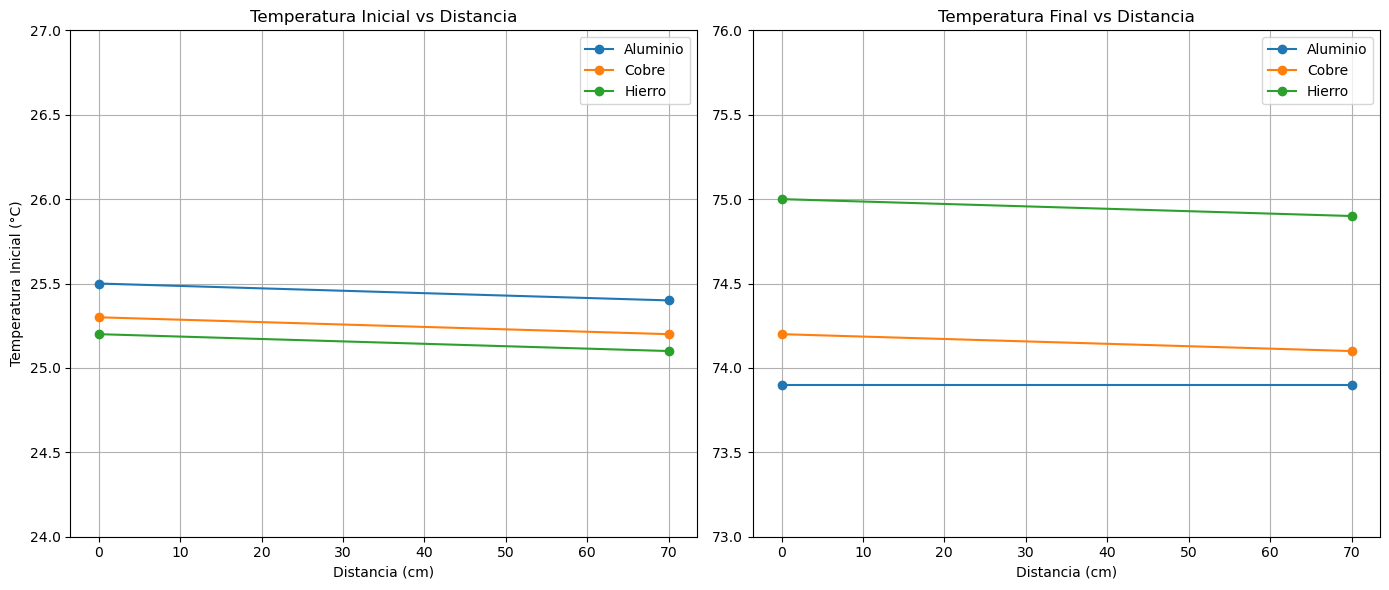

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos las posiciones de las termocuplas (en cm)
posiciones = np.array([0, 70])  # cm

# Crear una figura con dos subplots (1 fila, 2 columnas) SIN compartir el eje y
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # Se elimina sharey=True

# Graficamos las temperaturas iniciales en el primer subplot
for material, datos in materiales.items():
    T_iniciales = np.array([datos['T_inicial_izq'], datos['T_inicial_der']])
    axs[0].plot(posiciones, T_iniciales, marker='o', label=material)
axs[0].set_title("Temperatura Inicial vs Distancia")
axs[0].set_xlabel("Distancia (cm)")
axs[0].set_ylabel("Temperatura Inicial (°C)")
axs[0].set_ylim(24, 27)
axs[0].legend(loc='best')
axs[0].grid(True)

# Graficamos las temperaturas finales en el segundo subplot
for material, datos in materiales.items():
    T_finales = np.array([datos['T_final_izq'], datos['T_final_der']])
    axs[1].plot(posiciones, T_finales, marker='o', label=material)
axs[1].set_title("Temperatura Final vs Distancia")
axs[1].set_xlabel("Distancia (cm)")
axs[1].set_ylim(73, 76)
axs[1].legend(loc='best')
axs[1].grid(True)

plt.tight_layout()
plt.show()

## Conclusión

El análisis realizado permitió determinar el coeficiente de expansión térmica para Aluminio, Cobre e Hierro utilizando mediciones de longitud y temperatura. Aunque los valores obtenidos muestran una alta precisión (baja incertidumbre), se observa que los coeficientes calculados son mayores a los valores teóricos o de literatura. Esto sugiere que puede haber una sobreestimación en la medición de $ \Delta L $ o que las condiciones experimentales (por ejemplo, la distribución homogénea de la temperatura a lo largo de la varilla) no se han cumplido a cabalidad.

Para mejorar la exactitud, es recomendable:
- Realizar múltiples mediciones para obtener una mayor estadística.
- Revisar la calibración de los instrumentos de medición.
- Considerar otros posibles errores sistemáticos (por ejemplo, la incertidumbre en $ L_0 $) y refinarlos en la propagación de errores.

En resumen, el método y el análisis estadístico empleados son adecuados para determinar $ \alpha $ y cuantificar la incertidumbre, pero la discrepancia con valores de referencia resalta la importancia de controlar y mejorar la metodología experimental.